In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

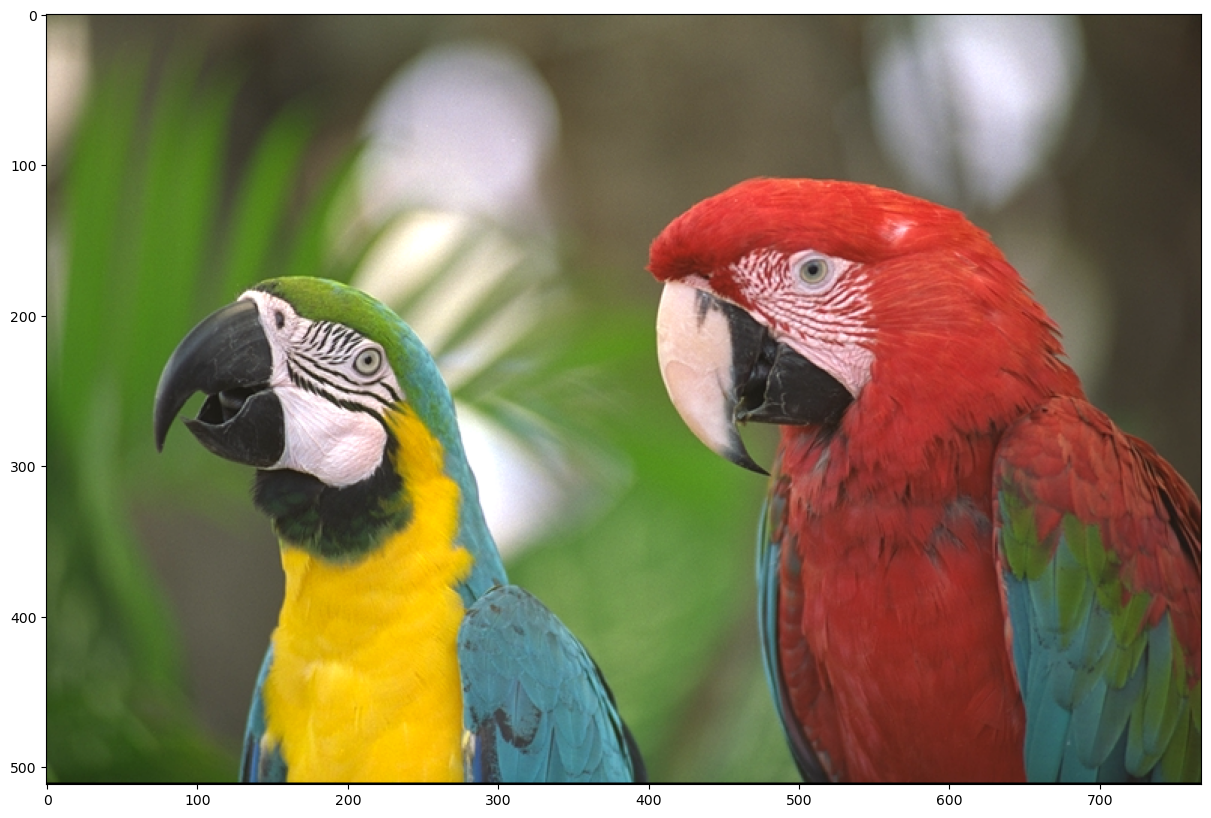

In [2]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [4]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin(np.linalg.norm(colors - pixel, axis=1))]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

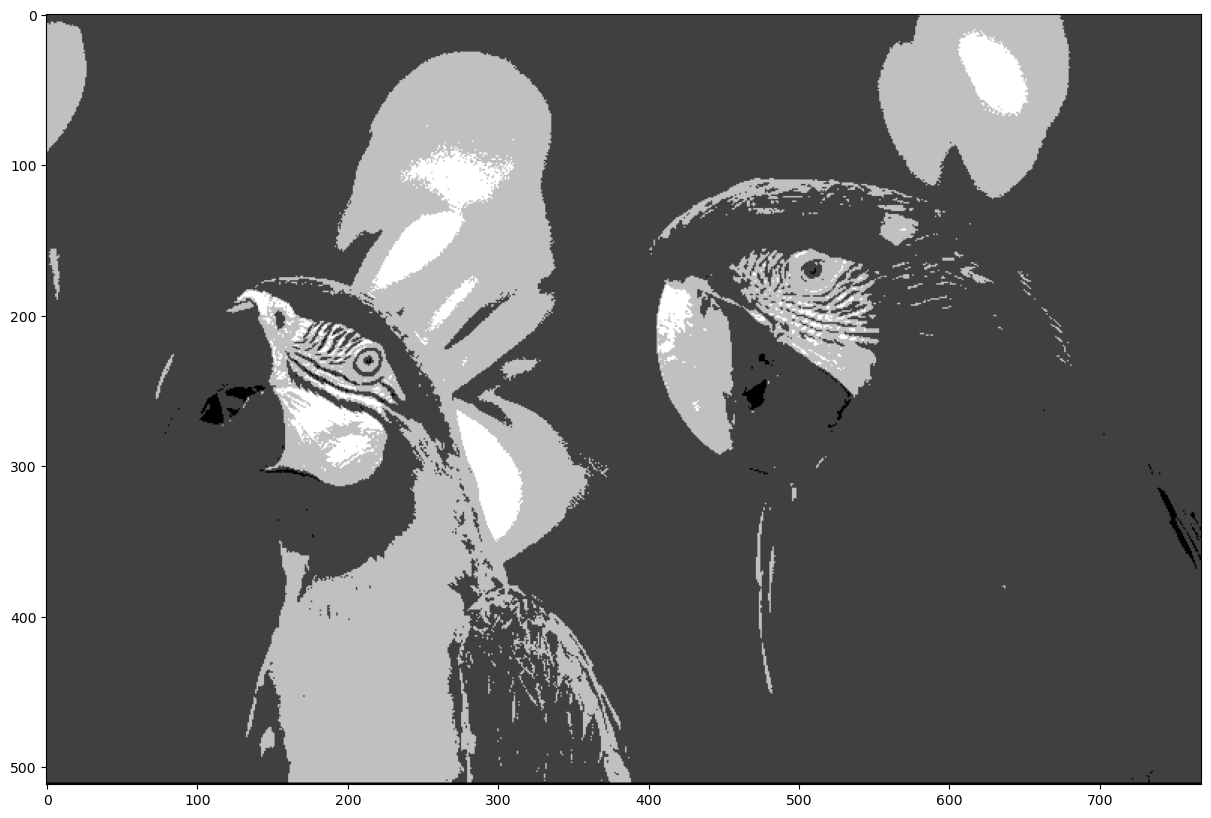

In [5]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [6]:
# Compute average quantization error
avg_quant_error = np.mean(np.linalg.norm(img - quantized, axis=2))

In [7]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        
        # Find the closest colour from the palette (using absolute value/Euclidean distance)
        new_pixel = colors[np.argmin(np.linalg.norm(colors - pixel, axis=1))]
        
        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error according to the FS diffusion matrix
        img_tmp[r+1, c, :] += quant_error * (7/16)
        img_tmp[r-1, c+1, :] += quant_error * (3/16)
        img_tmp[r, c+1, :] += quant_error * (5/16)
        img_tmp[r+1, c+1, :] += quant_error * (1/16)

        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x199bdf885e0>)

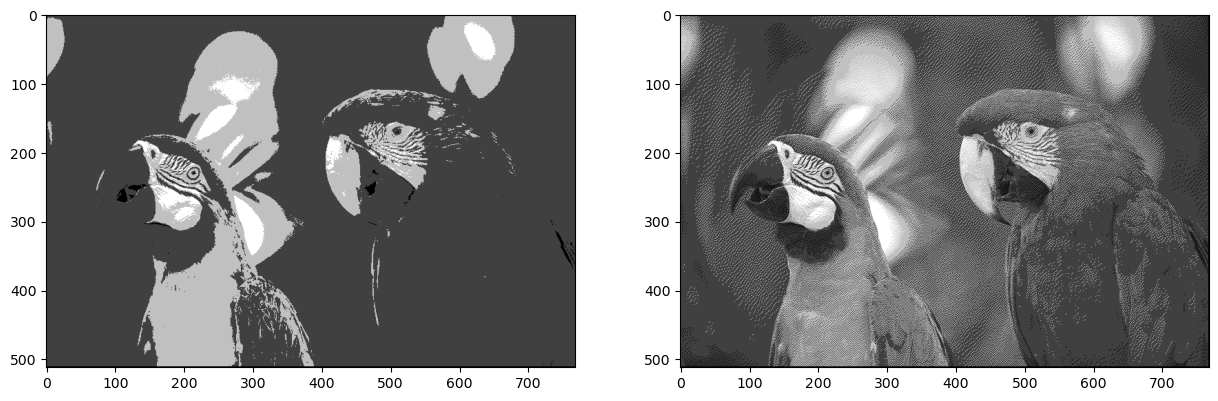

In [8]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8)) # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8)) # dithering

In [9]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean(np.linalg.norm(img - dithering, axis=2))

In [10]:
#Which image has higher quantization error? Optimally quantized or dithered?
#Dithered image has higher quantization error.
if avg_quant_error > avg_dith_error:
    print("Optimally quantized image has higher quantization error")
else:
    print("Dithered image has higher quantization error.")

#Which image looks better to you?
#Dithered image looks better to me.



Dithered image has higher quantization error.


(<Axes: >, <matplotlib.image.AxesImage at 0x199bdf74730>)

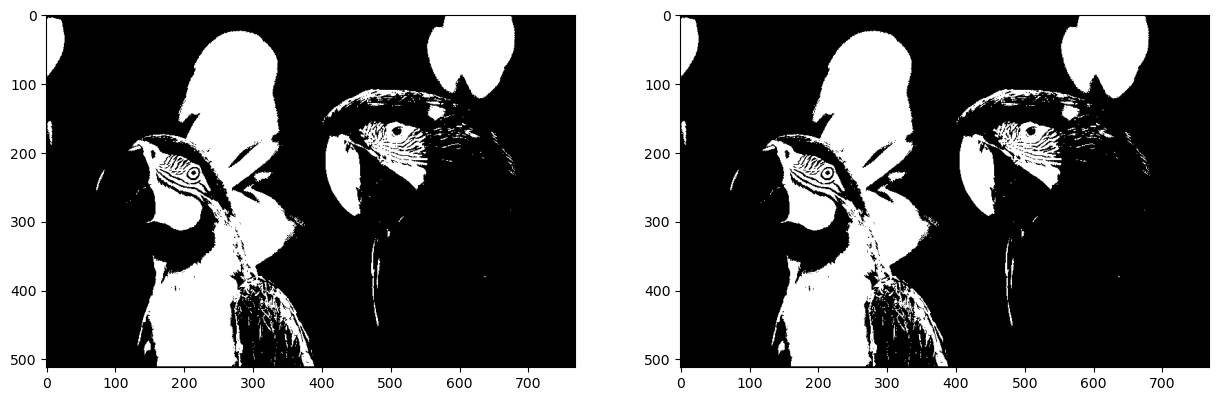

In [11]:
#Can you repeat the same process using only two colours: black and white? Show me :-)

img_tmp = np.copy(img)
colors = np.array([[0, 0, 0], [255, 255, 255]])  # Define the colors (black and white)

rows, cols, _ = img_tmp.shape

# Quantize the image to the specified colors
quantized = np.zeros_like(img_tmp)
for r in range(rows):
    for c in range(cols):
        pixel = img_tmp[r, c, :]
        new_pixel = colors[np.argmin(np.linalg.norm(colors - pixel, axis=1))]
        quantized[r, c, :] = new_pixel

# Perform dithering using Floyd-Steinberg algorithm
dithering = np.zeros_like(img_tmp)
for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = quantized[r, c, :]
        new_pixel = colors[np.argmin(np.linalg.norm(colors - pixel, axis=1))]
        quant_error = pixel - new_pixel
        img_tmp[r+1, c, :] += quant_error * (7/16)
        img_tmp[r-1, c+1, :] += quant_error * (3/16)
        img_tmp[r, c+1, :] += quant_error * (5/16)
        img_tmp[r+1, c+1, :] += quant_error * (1/16)
        dithering[r, c, :] = new_pixel

# Display the quantized and dithered images using matplotlib
plt.subplot(121), plt.imshow(quantized.astype(np.uint8)) # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8)) # dithering


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

C:\Users\sedro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


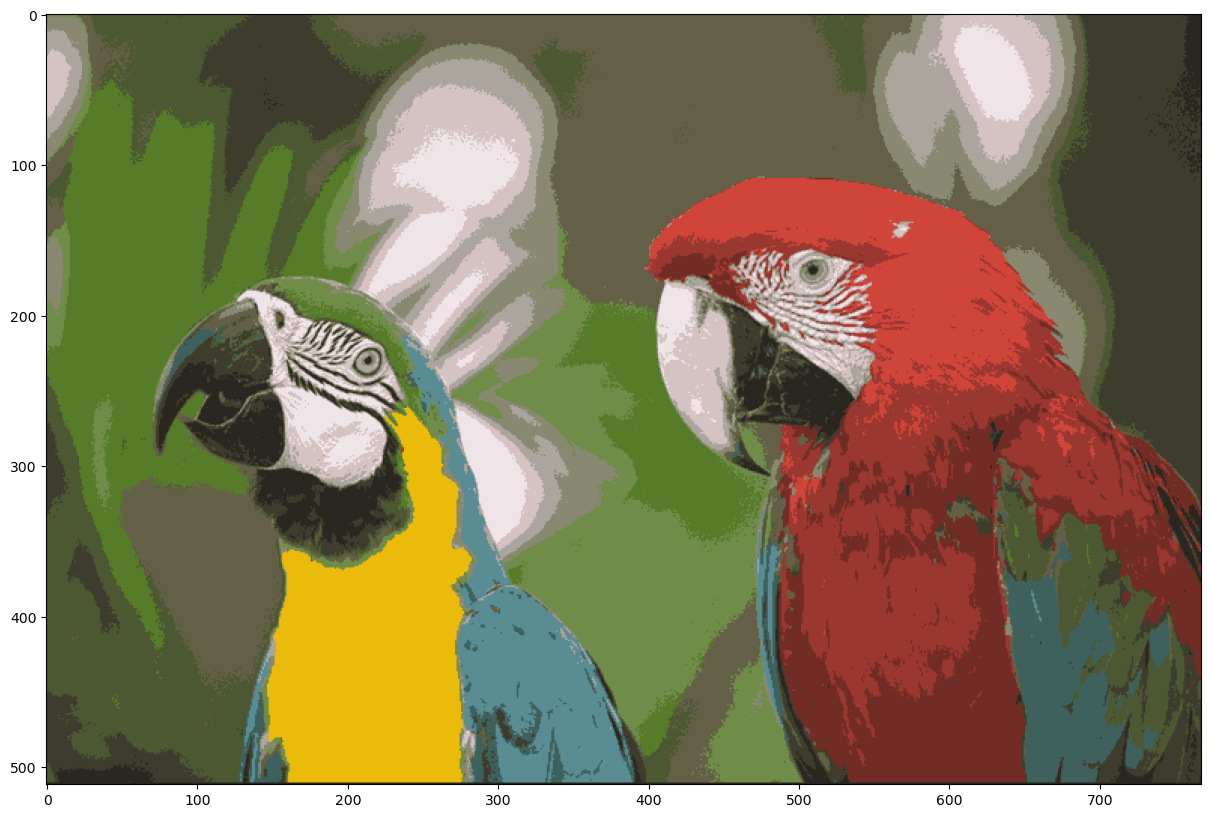

In [16]:
quantized = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Calculate the distance between each colour in the palette and a pixel
        distances = np.linalg.norm(colors - pixel, axis=1)
        
        # Find the index of the nearest colour
        closest_color_index = np.argmin(distances)
        
        # Set a new pixel from the optimal colour palette
        new_pixel = colors[closest_color_index]
        
        # Apply quantisation
        quantized[r, c, :] = new_pixel

# Convert the image back to the uint8 type
quantized = quantized.astype(np.uint8)

# Display the quantised image
plt.imshow(quantized)

In [14]:
How does the result look like to you?
The resulting image has a reduced colour palette with 16 different colours.

What happens if we use 32 colours?
The resulting image will have a slightly larger color palette 
compared to the 16-color version, providing more color variation in the quantized image.

And what happens if we use 256 colours?
The resulting image will have a significantly larger colour palette, resulting in finer colour detail in the quantized image.
This means that the quantized image will be closer to the original image in terms of colour representation.

SyntaxError: invalid syntax (1430372612.py, line 3)